# Trabalho Final - Pós em Business Inteligence Master
## Aluna: Carolina Meduna Baziewicz
## Orientadora: Prof. Dr. Manoela Kohler
## Título do Trabalho: Aplicação_de_Machine_Learning_em_Classificação_para_o_Planejamento_da_Demanda_Probabilística_de_Recursos_Críticos_Submarinos

In [54]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [55]:
# Ler Excel Original
data = pd.read_excel(r"C:\Users\C2TX\OneDrive - PETROBRAS\Pasta Organizada\15. TCC Pós BI Master\Original.xlsx", engine='openpyxl')
data

,Descrição do Serviço,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Objetivo da Entrega,Prob. X Det.
0,INSTALAÇÃO DE ACESSÓRIOS - ESTAIAMENTO O_PLEM-...,INSTALAÇÃO DE ACESSÓRIOS,EMERGÊNCIA/CONTINGÊNCIA,4.4 DANOS EM SISTEMAS SUBMARINOS E/OU DE ANCOR...,UN-BC - SEDE Bacia de Campos,EMG 2024,Probabilistico
1,INSPEÇÃO PROGRAMADA PIDF-2 [GA_PRA-1/PLAEM-RO-...,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,PRA-1 / 2025,Determinístico
2,INSPEÇÃO PROGRAMADA PIDF-2 [GA_MSG-RO-01A/PRA-...,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,PRA-1 / 2025,Determinístico
3,INSPEÇÃO PROGRAMADA PIDF-2 [O_PRA-1/EXTR LIVRE...,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,PRA-1 / 2025,Determinístico
4,INSPEÇÃO PROGRAMADA - MOBO [PI MOBO] 9-JUB-26D...,INSPEÇÃO PROGRAMADA - MOBO,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.1 INSPEÇÃO DE EQUIPAMENTOS SUBMARINOS,UN-ES - SEDE Espírito Santo,P-57/2025,-
...,...,...,...,...,...,...,...
172255,LANÇAMENTO DE ÂNCORA TORPEDO 06 - AHTS A / FPS...,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,TLD DE SÉPIA,Determinístico
172256,LANÇAMENTO DE ÂNCORA TORPEDO 02 - AHTS ROV / F...,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,TLD DE SÉPIA,Determinístico
172257,HOOK UP SEQ 01 - AHTS A - CARAGUA / FPSO CIDAD...,HOOK UP,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,1o OLEO LAPA - FPSO CIDADE DE CARAGUATATUBA,Determinístico
172258,LANÇAMENTO DE LINHA DE ANCORAGEM 01 - AHTS A -...,LANÇAMENTO DE LINHA DE ANCORAGEM,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,ANCORAGEM CIDADE DE SAQUAREMA,Determinístico


In [56]:
#tirar colunas que tem informação repetida em outra coluna

data = data.drop(labels='Descrição do Serviço',axis = 'columns')
data = data.drop(labels='Objetivo da Entrega',axis = 'columns')
data

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
0,INSTALAÇÃO DE ACESSÓRIOS,EMERGÊNCIA/CONTINGÊNCIA,4.4 DANOS EM SISTEMAS SUBMARINOS E/OU DE ANCOR...,UN-BC - SEDE Bacia de Campos,Probabilistico
1,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
2,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
3,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
4,INSPEÇÃO PROGRAMADA - MOBO,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.1 INSPEÇÃO DE EQUIPAMENTOS SUBMARINOS,UN-ES - SEDE Espírito Santo,-
...,...,...,...,...,...
172255,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172256,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172257,HOOK UP,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172258,LANÇAMENTO DE LINHA DE ANCORAGEM,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico


In [57]:
data.tail()

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
172255,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172256,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172257,HOOK UP,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172258,LANÇAMENTO DE LINHA DE ANCORAGEM,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172259,SINALIZAÇÃO PARA TORPEDO DE ANCORAGEM,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico


In [58]:
# Transformar em DataFrame
df = pd.DataFrame(data)
df

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
0,INSTALAÇÃO DE ACESSÓRIOS,EMERGÊNCIA/CONTINGÊNCIA,4.4 DANOS EM SISTEMAS SUBMARINOS E/OU DE ANCOR...,UN-BC - SEDE Bacia de Campos,Probabilistico
1,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
2,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
3,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
4,INSPEÇÃO PROGRAMADA - MOBO,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.1 INSPEÇÃO DE EQUIPAMENTOS SUBMARINOS,UN-ES - SEDE Espírito Santo,-
...,...,...,...,...,...
172255,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172256,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172257,HOOK UP,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172258,LANÇAMENTO DE LINHA DE ANCORAGEM,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico


In [59]:
# Tirar linhas que originalmente não tem Classificação (Linhas que são "-" na coluna resposta)
filtro = df['Prob. X Det.'] != '-'
df1 = df[filtro]
df1

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
0,INSTALAÇÃO DE ACESSÓRIOS,EMERGÊNCIA/CONTINGÊNCIA,4.4 DANOS EM SISTEMAS SUBMARINOS E/OU DE ANCOR...,UN-BC - SEDE Bacia de Campos,Probabilistico
1,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
2,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
3,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
5,INSPEÇÃO PROGRAMADA PIDF-2,MANUTENÇÃO E OPERAÇÃO DE SISTEMAS SUBMARINOS E...,2.3 INSPEÇÃO DE DUTOS,UN-ES - SEDE Espírito Santo,Determinístico
...,...,...,...,...,...
172255,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172256,LANÇAMENTO DE ÂNCORA,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172257,HOOK UP,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico
172258,LANÇAMENTO DE LINHA DE ANCORAGEM,IMPLANTAÇÃO DE NOVOS SISTEMAS SUBMARINOS E DE ...,1.5 ANCORAGEM DE UNIDADE MARITIMA,UN-BS - EDISA II Santos -,Determinístico


In [60]:
#Transformar base em uma base dummy, porque os valores da tabela não são números, são textos categorizados

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Aplicando o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_encoded_OHE = encoder.fit_transform(df1)

# Aplicando o LabelEncoder para cada coluna categórica
X_encoded_LE = df1.apply(LabelEncoder().fit_transform)



In [61]:
X_encoded_LE

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
0,222,1,50,7,1
1,211,3,28,9,0
2,211,3,28,9,0
3,211,3,28,9,0
5,211,3,28,9,0
...,...,...,...,...,...
172255,268,2,10,8,0
172256,268,2,10,8,0
172257,105,2,10,8,0
172258,266,2,10,8,0


In [62]:
X_encoded_LE.describe()


,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
count,119964.000000,119964.000000,119964.000000,119964.000000,119964.000000
mean,235.016180,2.469599,20.241798,7.299782,0.142326
std,133.559762,0.882066,12.942825,1.582531,0.349386
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.000000,2.000000,11.000000,7.000000,0.000000
50%,214.000000,3.000000,18.000000,7.000000,0.000000
75%,311.000000,3.000000,28.000000,8.000000,0.000000
max,555.000000,3.000000,53.000000,12.000000,1.000000


In [63]:
#tirar a coluna do true or false da resposta determinística e ficar só com a probabilista 

#df1 = df1.drop(labels='Prob. X Det._Determinístico',axis = 'columns')
df1 = X_encoded_LE
df1

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
0,222,1,50,7,1
1,211,3,28,9,0
2,211,3,28,9,0
3,211,3,28,9,0
5,211,3,28,9,0
...,...,...,...,...,...
172255,268,2,10,8,0
172256,268,2,10,8,0
172257,105,2,10,8,0
172258,266,2,10,8,0


In [64]:
# Separar em duas bases, uma para treino e teste e outra para classificar de fato

# Definir o tamanho das bases
total_rows = len(df1)
base1_size = int(total_rows * 0.90)
base2_size = total_rows - base1_size

# Embaralhar as linhas do DataFrame
df1_shuffled = df1.sample(frac=1, random_state=42).reset_index(drop=True)

# Dividir as bases
base1 = df1_shuffled.iloc[:base1_size]
base2 = df1_shuffled.iloc[base1_size:]

In [65]:
df_TreinoTeste = pd.DataFrame(base1)
df_TreinoTeste

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
0,217,3,14,8,0
1,173,3,18,7,0
2,210,3,28,4,0
3,173,3,23,9,1
4,250,2,5,8,0
...,...,...,...,...,...
107962,267,2,10,8,0
107963,234,0,42,7,0
107964,275,2,0,7,0
107965,286,3,30,8,1


In [66]:

df_Classificar = pd.DataFrame(base2)
df_Classificar


,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
107967,102,2,10,7,0
107968,163,3,14,7,0
107969,21,2,10,7,0
107970,149,3,14,4,0
107971,383,0,42,7,0
...,...,...,...,...,...
119959,293,3,32,7,1
119960,442,3,18,7,0
119961,262,3,34,7,1
119962,40,0,42,7,0


In [67]:
df_TreinoTeste.shape

(107967, 5)

In [68]:
df_TreinoTeste.describe().T  # T faz a transposta da matriz

,count,mean,std,min,25%,50%,75%,max
Classe de Serviço,107967.0,235.024174,133.465908,0.0,149.0,214.0,311.0,555.0
Classe de Entrega,107967.0,2.471311,0.880063,0.0,2.0,3.0,3.0,3.0
Classe de Demanda,107967.0,20.238304,12.936117,0.0,11.0,18.0,28.0,53.0
UO Origem,107967.0,7.302472,1.582960,0.0,7.0,7.0,8.0,12.0
Prob. X Det.,107967.0,0.142636,0.349703,0.0,0.0,0.0,0.0,1.0


## Separar base em treino e teste

In [69]:
from sklearn.model_selection import train_test_split
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = df_TreinoTeste.loc[:, df_TreinoTeste.columns != 'Prob. X Det.']  # Entrada
y = df_TreinoTeste['Prob. X Det.']    # Saída
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)

In [70]:
y.value_counts()

Prob. X Det.
0    92567
1    15400
Name: count, dtype: int64

In [71]:
# Verificar proporção para teste para confirmar amostragem estratificada
print(0.2*y.value_counts()[0])
print(0.2*y.value_counts()[1])

18513.4
3080.0


In [72]:
y_test.value_counts()

Prob. X Det.
0    18514
1     3080
Name: count, dtype: int64

In [73]:
# Vamos olhar os shapes da bases de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86373, 4), (21594, 4), (86373,), (21594,))

In [79]:
# treinar modelo
# importar https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed, max_depth=None, min_samples_leaf=1):
  model = DecisionTreeClassifier(random_state=seed, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

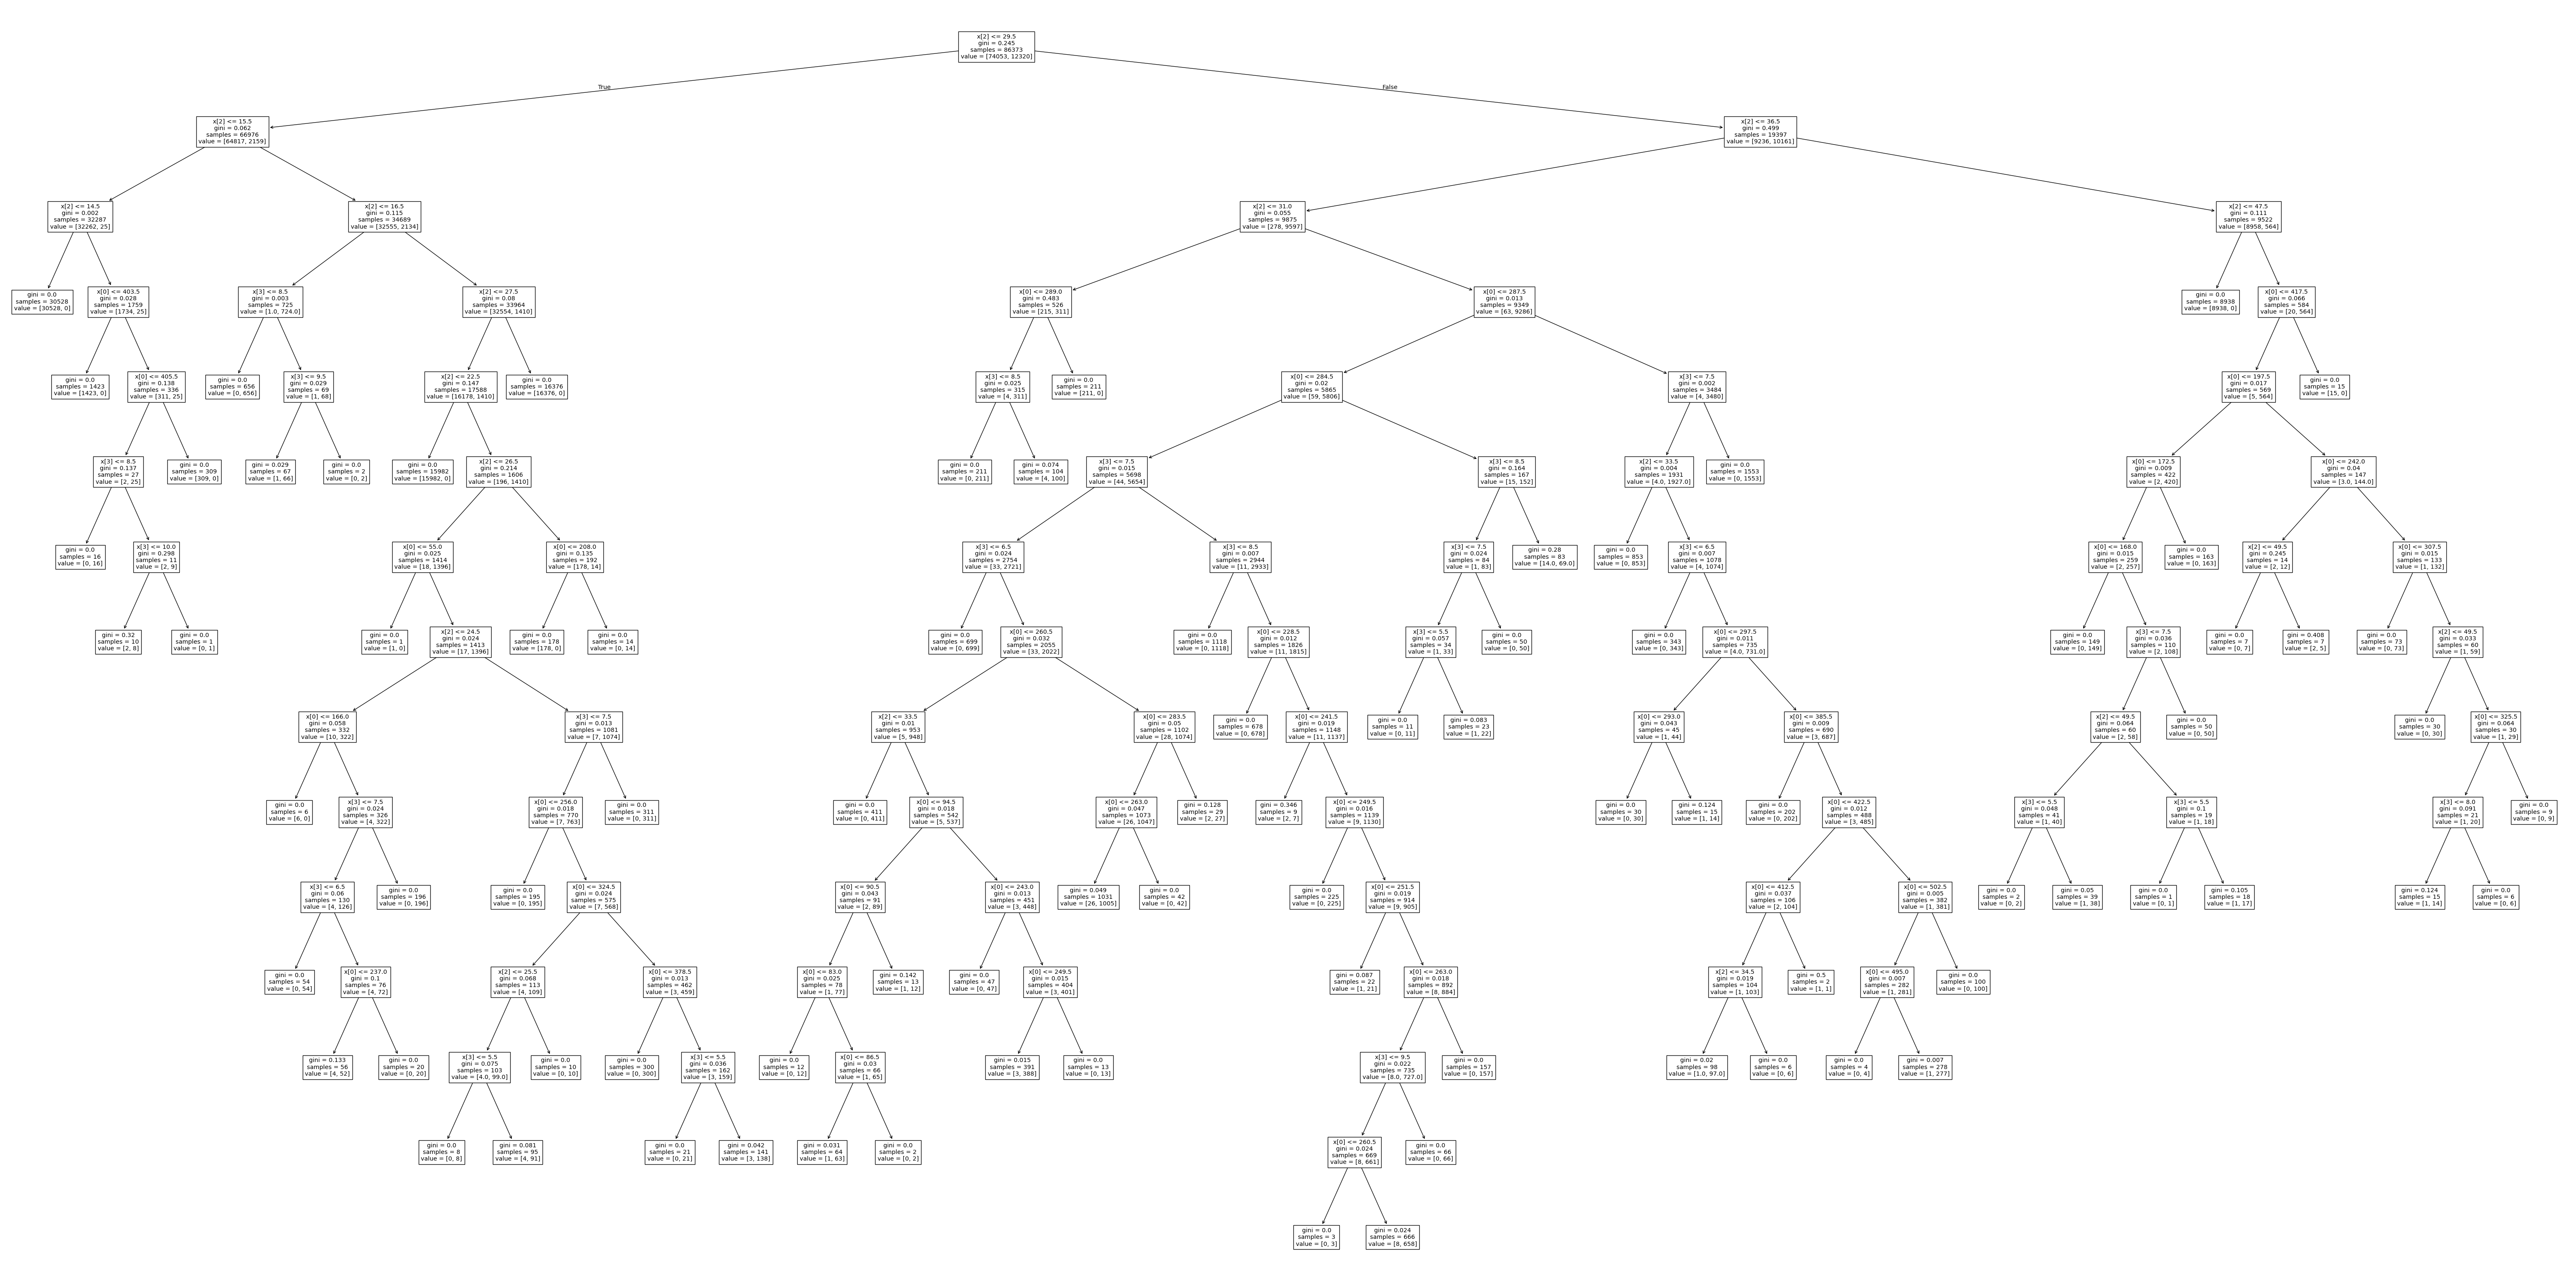

In [80]:
# Visualização gráfica da árvore de decisão
from sklearn.tree import plot_tree
plt.subplots(figsize=(80, 40)) # Definir tamanho da imagem a ser gerada
plot_tree(model)
plt.savefig('tree.png') # Salva a imagem

In [81]:
# profundidade da árvore
model.get_depth()

14

Resultados de Treino
Acurácia:  0.9990043184791544
Kappa:  0.9959406115564705
F1:  0.9965215984468533


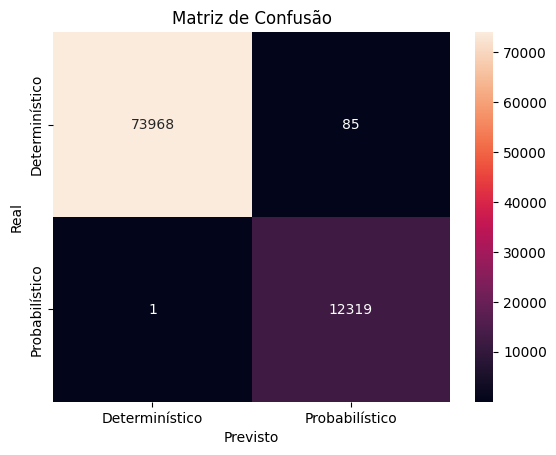

Resultados de Teste
Acurácia:  0.9987033435213485
Kappa:  0.994714098573155
F1:  0.9954707214493691


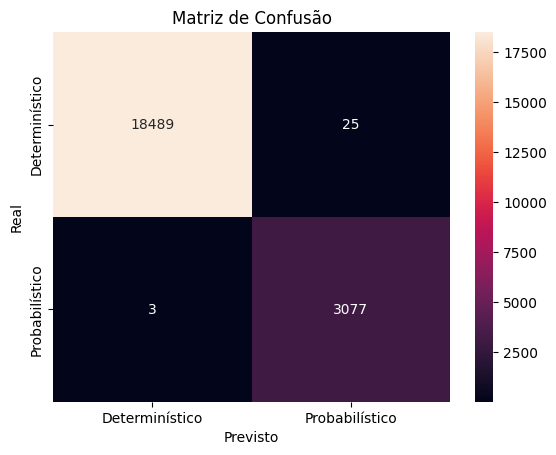

In [82]:
def predict_and_evaluate(model, X_test, y_test):

  # inferência do teste
  y_pred = model.predict(X_test)

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
  ax.yaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

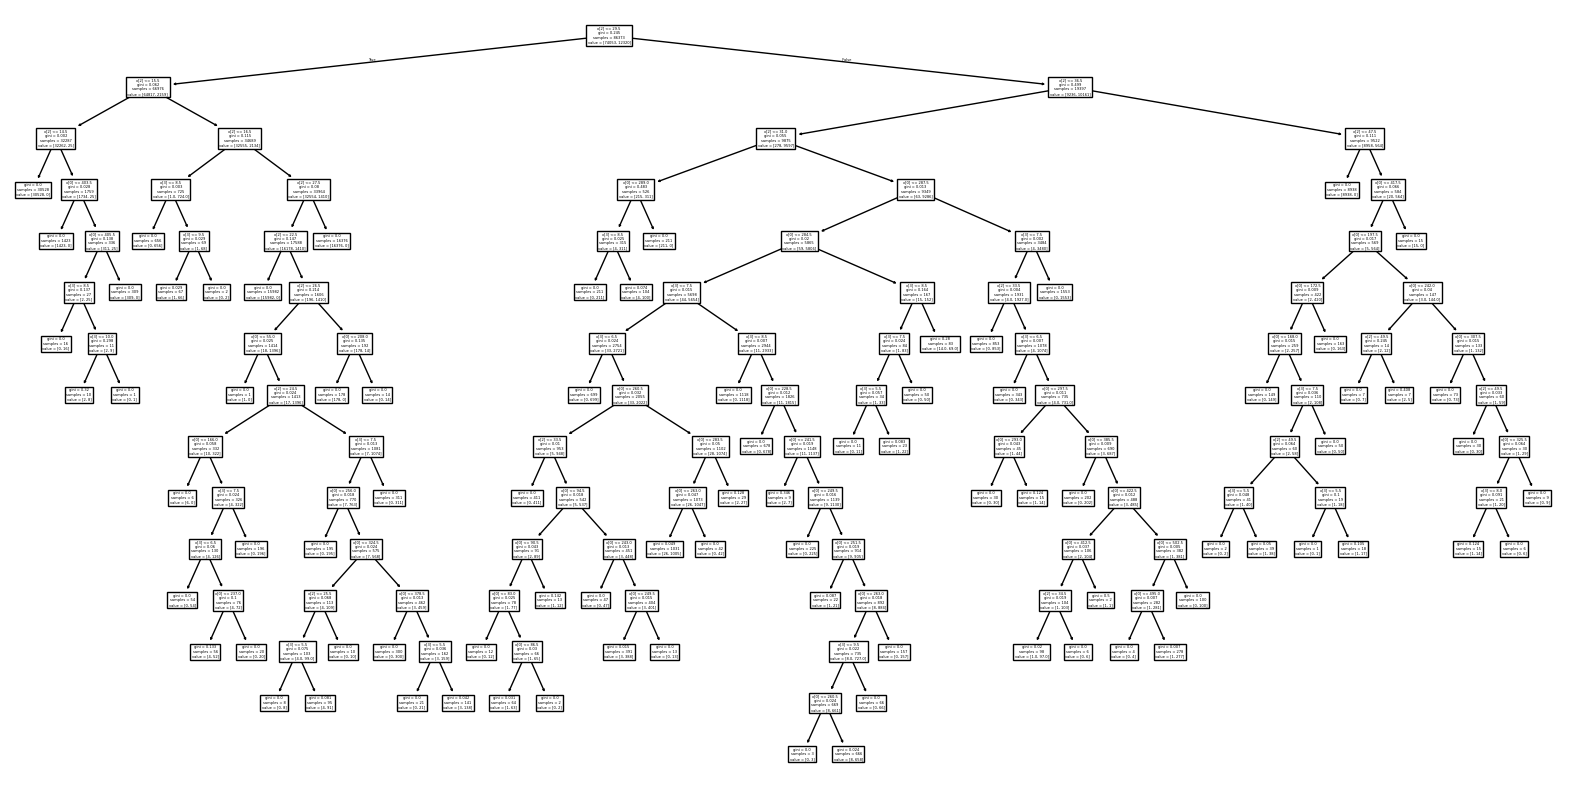

In [83]:
# Visualização gráfica da árvore de decisão
plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
plot_tree(model)
plt.savefig('tree_final.png') # Salva a imagem

In [84]:
df_Classificar = pd.DataFrame(base2)
df_Classificar

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.
107967,102,2,10,7,0
107968,163,3,14,7,0
107969,21,2,10,7,0
107970,149,3,14,4,0
107971,383,0,42,7,0
...,...,...,...,...,...
119959,293,3,32,7,1
119960,442,3,18,7,0
119961,262,3,34,7,1
119962,40,0,42,7,0


In [85]:
# Dropar a coluna resposta da base a classificar
df_ClassificarSemResp = df_Classificar.drop(labels='Prob. X Det.',axis = 'columns')
df_ClassificarSemResp

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem
107967,102,2,10,7
107968,163,3,14,7
107969,21,2,10,7
107970,149,3,14,4
107971,383,0,42,7
...,...,...,...,...
119959,293,3,32,7
119960,442,3,18,7
119961,262,3,34,7
119962,40,0,42,7


In [36]:
#new_data_normalized = scaler.transform(df_ClassificarSemResp)

In [86]:
inferences = model.predict(df_ClassificarSemResp)

In [87]:
inferences

array([0, 0, 0, ..., 1, 0, 0])

In [88]:
# 4. Visualizar inferências juntamente com a base original
df_Classificar['previsoes'] = inferences
df_Classificar.head(len(df_Classificar))

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.,previsoes
107967,102,2,10,7,0,0
107968,163,3,14,7,0,0
107969,21,2,10,7,0,0
107970,149,3,14,4,0,0
107971,383,0,42,7,0,0
...,...,...,...,...,...,...
119959,293,3,32,7,1,1
119960,442,3,18,7,0,0
119961,262,3,34,7,1,1
119962,40,0,42,7,0,0


Acurácia:  0.999166458281237
Kappa:  0.9965357223421739
F1:  0.9970202622169249


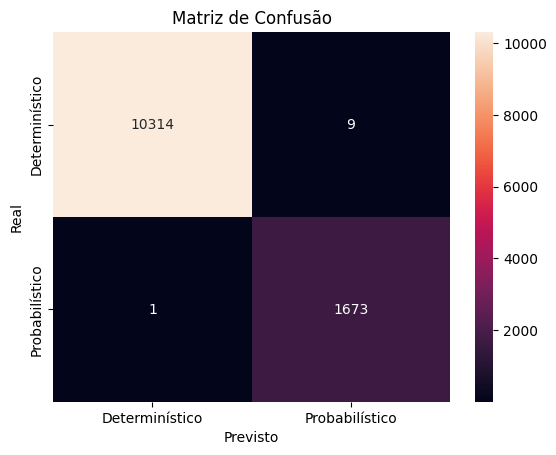

In [98]:
# 5. Mapa da Calor da Resposta
# Matriz de confusão
y_real = df_Classificar['Prob. X Det.']
y_previsao = df_Classificar['previsoes']

# Acurácia
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_real, y_previsao)
print('Acurácia: ', accuracy)

# Kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_real, y_previsao)
print('Kappa: ', kappa)

# F1
from sklearn.metrics import f1_score
f1 = f1_score(y_real, y_previsao)
print('F1: ', f1)

from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_real, y_previsao)

ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
ax.yaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
plt.show()

In [34]:
df_Classificar.describe().T

,count,mean,std,min,25%,50%,75%,max
Classe de Serviço,11997.0,234.944236,134.407030,2.0,149.0,214.0,311.0,555.0
Classe de Entrega,11997.0,2.454197,0.899783,0.0,2.0,3.0,3.0,3.0
Classe de Demanda,11997.0,20.273235,13.003534,0.0,11.0,18.0,28.0,52.0
UO Origem,11997.0,7.275569,1.578526,3.0,7.0,7.0,8.0,12.0
Prob. X Det.,11997.0,0.139535,0.346518,0.0,0.0,0.0,0.0,1.0
previsoes,11997.0,0.140202,0.347211,0.0,0.0,0.0,0.0,1.0


In [36]:
# Tente usar o método predict_proba e tente entender o que ele nos retorna
conf = model.predict_proba(df_ClassificarSemResp)
conf

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.02521823, 0.97478177],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [37]:
# Salvar inferências e confiança
df_Classificar['conf0'] = conf[:,0]
df_Classificar['conf1'] = conf[:,1]
df_Classificar.head(len(df_Classificar))

,Classe de Serviço,Classe de Entrega,Classe de Demanda,UO Origem,Prob. X Det.,previsoes,conf0,conf1
107967,102,2,10,7,0,0,1.000000,0.000000
107968,163,3,14,7,0,0,1.000000,0.000000
107969,21,2,10,7,0,0,1.000000,0.000000
107970,149,3,14,4,0,0,1.000000,0.000000
107971,383,0,42,7,0,0,1.000000,0.000000
...,...,...,...,...,...,...,...,...
119959,293,3,32,7,1,1,0.000000,1.000000
119960,442,3,18,7,0,0,1.000000,0.000000
119961,262,3,34,7,1,1,0.025218,0.974782
119962,40,0,42,7,0,0,1.000000,0.000000


In [38]:
# 5. Exportar os dados inferidos para um csv
df_Classificar.to_csv('results AD ID3.csv', index=False, encoding='latin')

PRA CIMA É ARVORE DE DECISÃO ID3
PRA BAIXO É O SVM

In [99]:


# Ler Excel Original
data = pd.read_excel(r"C:\Users\C2TX\OneDrive - PETROBRAS\Pasta Organizada\15. TCC Pós BI Master\Original.xlsx", engine='openpyxl')
data

#tirar colunas que tem informação repetida em outra coluna
data = data.drop(labels='Descrição do Serviço',axis = 'columns')
data = data.drop(labels='Objetivo da Entrega',axis = 'columns')
data

# Transformar em DataFrame
df = pd.DataFrame(data)
df

# Tirar linhas que originalmente não tem Classificação (Linhas que são "-" na coluna resposta)
filtro = df['Prob. X Det.'] != '-'
df1 = df[filtro]
df1

#Transformar base em uma base dummy, porque os valores da tabela não são números, são textos categorizados
df1 = pd.get_dummies(df1)
df1

df1 = df1.drop(labels='Prob. X Det._Determinístico',axis = 'columns')
df1

# Separar em duas bases, uma para treino e teste e outra para classificar de fato

# Definir o tamanho das bases
total_rows = len(df1)
base1_size = int(total_rows * 0.90)
base2_size = total_rows - base1_size

# Embaralhar as linhas do DataFrame
df1_shuffled = df1.sample(frac=1, random_state=42).reset_index(drop=True)

# Dividir as bases
base1 = df1_shuffled.iloc[:base1_size]
base2 = df1_shuffled.iloc[base1_size:]

df_TreinoTeste = pd.DataFrame(base1)
df_TreinoTeste

df_Classificar = pd.DataFrame(base2)
df_Classificar

df_TreinoTeste.describe().T  # T faz a transposta da matriz

from sklearn.model_selection import train_test_split
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = df_TreinoTeste.loc[:, df_TreinoTeste.columns != 'Prob. X Det._Probabilistico']  # Entrada
y = df_TreinoTeste['Prob. X Det._Probabilistico']    # Saída
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)

# Vamos olhar os shapes da bases de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86373, 626), (21594, 626), (86373,), (21594,))

##Machine Learning

In [100]:
# treinar modelo
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, seed)

### Avaliar modelo treinado na base de teste

In [101]:
X_test.shape

(21594, 626)

Resultados de Treino
Acurácia:  0.9990622069396686
Kappa:  0.9961762355098488
F1:  0.9967234335180616


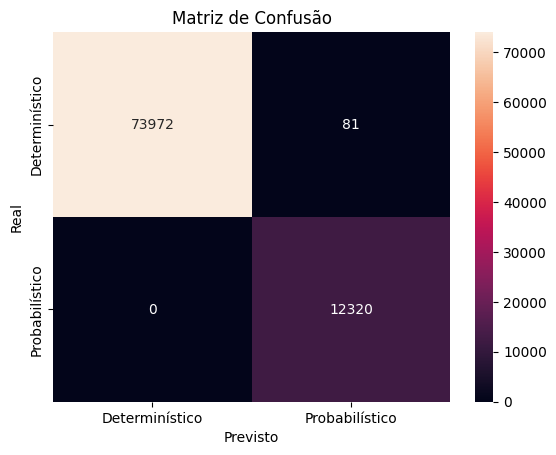

Resultados de Teste
Acurácia:  0.9986107252014449
Kappa:  0.9943426409357636
F1:  0.9951534733441034


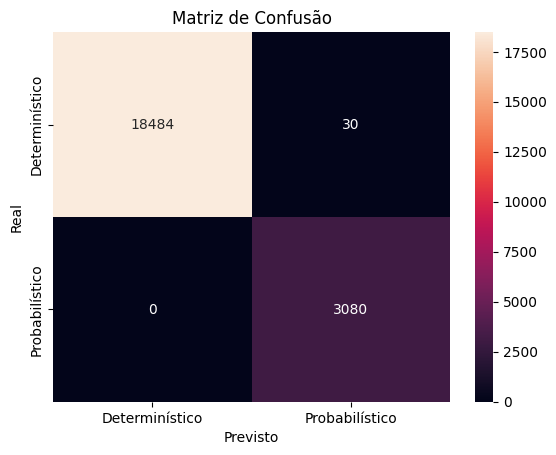

In [102]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test)  # inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
  ax.yaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
  plt.show()

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)

print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

Resultados de Treino
Acurácia:  0.9990622069396686
Kappa:  0.9961762355098488
F1:  0.9967234335180616


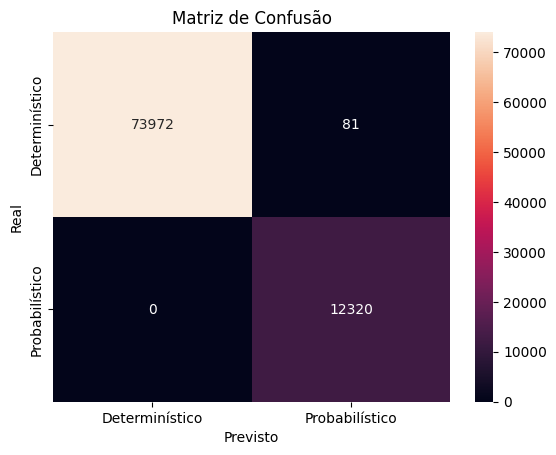

Resultados de Teste
Acurácia:  0.9986107252014449
Kappa:  0.9943426409357636
F1:  0.9951534733441034


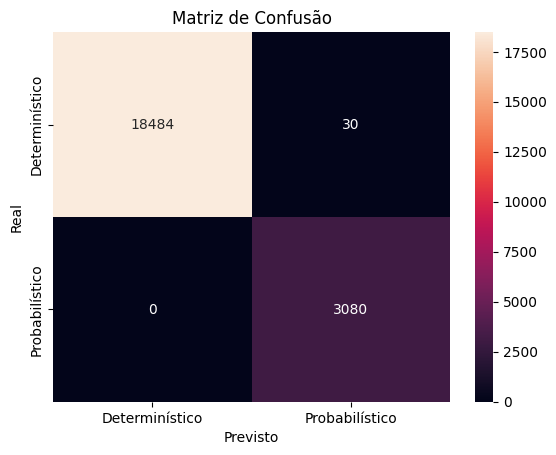

In [103]:
print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

In [104]:
df_Classificar = pd.DataFrame(base2)
df_Classificar

,Classe de Serviço_2#17#1373,Classe de Serviço_2#17#784,"Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E ABANDONO 2ª","Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E CVD 2ª","Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E PULL-IN 2ª","Classe de Serviço_ABANDONO 1ª, RETERMINAÇÃO E CVD 2ª",Classe de Serviço_ABERTURA DE CONEXÃO,Classe de Serviço_ANCORAGEM DEFINITIVA,Classe de Serviço_ANCORAGEM DEFINITIVA - ABANDONO DE AMARRA ESTICADA,Classe de Serviço_ANCORAGEM PROVISÓRIA - ABANDONO DE CACHO DE AMARRA,...,UO Origem_2908,UO Origem_BUZIOS/PRODUÇÃO - EDIHB,UO Origem_E&P Corporativo,UO Origem_UN-BA - Salvador,UO Origem_UN-BC - SEDE Bacia de Campos,UO Origem_UN-BS - EDISA II Santos -,UO Origem_UN-ES - SEDE Espírito Santo,UO Origem_UN-GAD - RN,UO Origem_UN-GAD - SE,Prob. X Det._Probabilistico
107967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
107968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
107969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
107970,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
107971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
119960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
119961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
119962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Inferir novos dados com modelo treinado!

In [105]:

# Dropar a coluna resposta da base a classificar

df_ClassificarSemResp = df_Classificar.drop(labels='Prob. X Det._Probabilistico',axis = 'columns')
df_ClassificarSemResp


,Classe de Serviço_2#17#1373,Classe de Serviço_2#17#784,"Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E ABANDONO 2ª","Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E CVD 2ª","Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E PULL-IN 2ª","Classe de Serviço_ABANDONO 1ª, RETERMINAÇÃO E CVD 2ª",Classe de Serviço_ABERTURA DE CONEXÃO,Classe de Serviço_ANCORAGEM DEFINITIVA,Classe de Serviço_ANCORAGEM DEFINITIVA - ABANDONO DE AMARRA ESTICADA,Classe de Serviço_ANCORAGEM PROVISÓRIA - ABANDONO DE CACHO DE AMARRA,...,UO Origem_2907,UO Origem_2908,UO Origem_BUZIOS/PRODUÇÃO - EDIHB,UO Origem_E&P Corporativo,UO Origem_UN-BA - Salvador,UO Origem_UN-BC - SEDE Bacia de Campos,UO Origem_UN-BS - EDISA II Santos -,UO Origem_UN-ES - SEDE Espírito Santo,UO Origem_UN-GAD - RN,UO Origem_UN-GAD - SE
107967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
107968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
107969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
107970,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
107971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
119960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
119961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
119962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [106]:
inferences = model.predict(df_ClassificarSemResp.values)

c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [107]:
inferences

array([False, False, False, ...,  True, False, False])

In [108]:
# 4. Visualizar inferências juntamente com a base original
df_Classificar['previsões'] = inferences
df_Classificar

,Classe de Serviço_2#17#1373,Classe de Serviço_2#17#784,"Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E ABANDONO 2ª","Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E CVD 2ª","Classe de Serviço_ABANDONO 1ª, LANÇAMENTO E PULL-IN 2ª","Classe de Serviço_ABANDONO 1ª, RETERMINAÇÃO E CVD 2ª",Classe de Serviço_ABERTURA DE CONEXÃO,Classe de Serviço_ANCORAGEM DEFINITIVA,Classe de Serviço_ANCORAGEM DEFINITIVA - ABANDONO DE AMARRA ESTICADA,Classe de Serviço_ANCORAGEM PROVISÓRIA - ABANDONO DE CACHO DE AMARRA,...,UO Origem_BUZIOS/PRODUÇÃO - EDIHB,UO Origem_E&P Corporativo,UO Origem_UN-BA - Salvador,UO Origem_UN-BC - SEDE Bacia de Campos,UO Origem_UN-BS - EDISA II Santos -,UO Origem_UN-ES - SEDE Espírito Santo,UO Origem_UN-GAD - RN,UO Origem_UN-GAD - SE,Prob. X Det._Probabilistico,previsões
107967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
107968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
107969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
107970,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
107971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
119960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
119961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
119962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [51]:
# 5. Exportar os dados inferidos para um csv
df_Classificar.to_csv('results SVC.csv', index=False, encoding='latin')

Acurácia:  0.9992498124531133
Kappa:  0.9968829285973179
F1:  0.9973190348525469


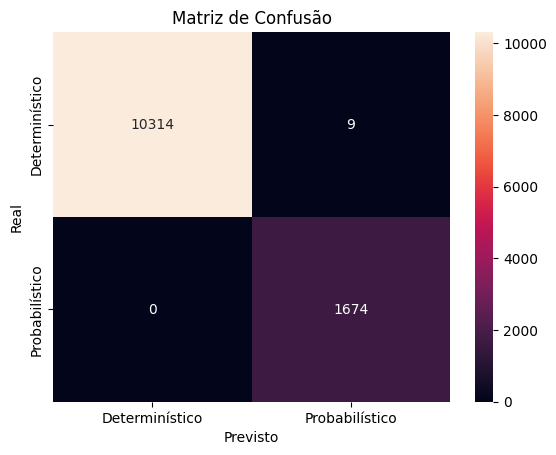

In [109]:
# 6. Mapa da Calor da Resposta
# Matriz de confusão
y_real = df_Classificar['Prob. X Det._Probabilistico']
y_previsao = df_Classificar['previsões']

# Acurácia
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_real, y_previsao)
print('Acurácia: ', accuracy)

# Kappa
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_real, y_previsao)
print('Kappa: ', kappa)

# F1
from sklearn.metrics import f1_score
f1 = f1_score(y_real, y_previsao)
print('F1: ', f1)

from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_real, y_previsao)

ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
ax.yaxis.set_ticklabels(['Determinístico', 'Probabilístico'])
plt.show()